# Most efficient cultural holiday in Florence

### by Francesca Scalesse

## **1. Introduction**

### **1.1 Background**

Florence is an italian city rich of history and cultural heritage sites like museums, churches... They are both in the city's centre or in peripheral zones. You can easily access to a lot of them because Florence is not a huge city so you can easily move even by foot. The possibility of cultural holiday are very large.

### **1.2 Problem**

My client wishes spent a cultural holiday (a week) in Florence visiting as many cultural sites as possible. In particular the client is interested in museums and churches. The most part of them are in the city's centre. The problem is that public transport cannot go in this zone because it is a pedestrian area. The best way is go by foot. In order to visit as many churches and museums as possible, my client wishes to find an hotel in a zone with the highest concentration of these sites. Price is not a problem.

### **1.3 Interest**

This work can be useful to anyone wants to spend an holiday in Florence visiting museums or churches for personal interest, job, study or research.

## **2. Data acquisition and cleaning**

### **2.1 Data source**

The source of data about the location of museums, churches and hotels is the website [Foursquare](https://foursquare.com/).

The dataframe about cultural sites will be used to create clusters, in order to find the zone with the highest content of these sites. Then the data frame with hotels will be overlapped to find wich hotels are in the zone with most cultural sites.

### **2.2 Importing, cleaning data and feature selection**

 **2.2.1 Import needed libraries**

In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation


!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize


! pip install folium==0.5.0
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

     |████████████████████████████████| 112kB 24.7MB/s eta 0:00:01
Folium installed
Libraries imported.


**2.2.2 Define Foursquare Credentials and Version**

In order to use Foursquare to acquiring data, it is needed to define credentials  and versions:

In [2]:
CLIENT_ID = 'Y2E14U4GP44DD3R0E1MLC51OSZ33I0QUJ1RTVXFGM2Y4NZBB' 
CLIENT_SECRET = '3LJYB5GP2QSSJ04W5F2ZGWOSVPOIVRN0FUMQ1IQYORDZ2OD4' 
ACCESS_TOKEN = 'SBC5N30W3PLCPW5RNKMJBRM3HYTAZRO4LMUHMYIARTS13MEM' 
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: Y2E14U4GP44DD3R0E1MLC51OSZ33I0QUJ1RTVXFGM2Y4NZBB
CLIENT_SECRET:3LJYB5GP2QSSJ04W5F2ZGWOSVPOIVRN0FUMQ1IQYORDZ2OD4


Florence is the city the client is interested in. Therefore, it will be our starting point. Its coordinates will be defined using geocode. In order to define an instance of the geocoder, we need to define a user_agent. We will name our agent foursquare_agent, as shown below.

**Note:** *Firenze, Toscana* is the italian name for *Florence, Tuscany*

In [3]:
address = 'Firenze, Toscana'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

43.7698712 11.2555757


**2.2.3 Searching museums and creating a dataframe**

Now define a query to search museums in Florence(in italian *museo* means museum).

In [4]:
search_query_museum = 'Museo'
radius = 500
print(search_query_museum + ' .... OK!')

Museo .... OK!


Define the corresponding URL

In [5]:
url_museum = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, search_query_museum, radius, LIMIT)
url_museum

'https://api.foursquare.com/v2/venues/search?client_id=Y2E14U4GP44DD3R0E1MLC51OSZ33I0QUJ1RTVXFGM2Y4NZBB&client_secret=3LJYB5GP2QSSJ04W5F2ZGWOSVPOIVRN0FUMQ1IQYORDZ2OD4&ll=43.7698712,11.2555757&oauth_token=SBC5N30W3PLCPW5RNKMJBRM3HYTAZRO4LMUHMYIARTS13MEM&v=20180604&query=Museo&radius=500&limit=30'

Send the GET Request and examine the results

In [6]:
results_museum = requests.get(url_museum).json()
results_museum

{'meta': {'code': 200, 'requestId': '60b561ee28767b1372a5da75'},
 'notifications': [{'type': 'notificationTray', 'item': {'unreadCount': 0}}],
 'response': {'venues': [{'id': '4e8026c577c8c61e00ca31c5',
    'name': 'Gucci Museo',
    'location': {'address': 'Piazza Della Signoria, 10',
     'lat': 43.76976229374217,
     'lng': 11.256747341104528,
     'labeledLatLngs': [{'label': 'display',
       'lat': 43.76976229374217,
       'lng': 11.256747341104528}],
     'distance': 94,
     'postalCode': '50122',
     'cc': 'IT',
     'city': 'Firenze',
     'state': 'Toscana',
     'country': 'Italia',
     'formattedAddress': ['Piazza Della Signoria, 10',
      '50122 Firenze Toscana',
      'Italia']},
    'categories': [{'id': '4bf58dd8d48988d181941735',
      'name': 'Museum',
      'pluralName': 'Museums',
      'shortName': 'Museum',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/museum_',
       'suffix': '.png'},
      'primary': True}],
    'ref

Get relevant part of JSON and transform it into a pandas dataframe

In [7]:
# assign relevant part of JSON to venues
venues_museum = results_museum['response']['venues']

# tranform venues into a dataframe
df_museum = json_normalize(venues_museum)
df_museum.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


id  \
0  4e8026c577c8c61e00ca31c5   
1  4bd00aa8b221c9b6c80cd3d0   
2  53524fb4498eb5c71458096a   
3  4b49d545f964a520507426e3   
4  4bd01a269854d13a1620f74d   

                                                name  \
0                                        Gucci Museo   
1                         Museo dell'Opera del Duomo   
2            Museo di Palazzo Vecchio (Museo Civico)   
3                       Museo Nazionale del Bargello   
4  Museo Galileo - Istituto e Museo di Storia del...   

                                          categories    referralId  hasPerk  \
0  [{'id': '4bf58dd8d48988d181941735', 'name': 'M...  v-1622499822    False   
1  [{'id': '4bf58dd8d48988d181941735', 'name': 'M...  v-1622499822    False   
2  [{'id': '4bf58dd8d48988d18f941735', 'name': 'A...  v-1622499822    False   
3  [{'id': '4bf58dd8d48988d18f941735', 'name': 'A...  v-1622499822    False   
4  [{'id': '4bf58dd8d48988d191941735', 'name': 'S...  v-1622499822    False   

            location.address  location.lat  location.lng  \
0  Piazza Della Signoria, 10     43.769762     11.256747   
1       Via della Canonica 1     43.772988     11.257492   
2      Piazza della Signoria     43.769422     11.256502   
3      Via del Proconsolo, 4     43.770058     11.258340   
4         Piazza dei Giudici     43.767799     11.256202   

                             location.labeledLatLngs  location.distance  \
0  [{'label': 'display', 'lat': 43.76976229374217...                 94   
1  [{'label': 'display', 'lat': 43.77298793077224...                379   
2  [{'label': 'display', 'lat': 43.7694221597928,...                 89   
3  [{'label': 'display', 'lat': 43.77005835195692...                223   
4  [{'label': 'display', 'lat': 43.76779899076643...                236   

  location.postalCode location.cc location.city location.state  \
0               50122          IT       Firenze        Toscana   
1               50122          IT       Firenze        Toscana   
2                 NaN          IT       Firenze        Toscana   
3               50122          IT       Firenze        Toscana   
4               50122          IT       Firenze        Toscana   

  location.country                          location.formattedAddress  \
0           Italia  [Piazza Della Signoria, 10, 50122 Firenze Tosc...   
1           Italia  [Via della Canonica 1 (Via dei Servi), 50122 F...   
2           Italia   [Piazza della Signoria, Firenze Toscana, Italia]   
3           Italia  [Via del Proconsolo, 4, 50122 Firenze Toscana,...   
4           Italia  [Piazza dei Giudici, 50122 Firenze Toscana, It...   

  location.crossStreet location.neighborhood  
0                  NaN                   NaN  
1        Via dei Servi                   NaN  
2                  NaN                   NaN  
3                  NaN                   NaN  
4                  NaN                   NaN

Define information of interest and filter dataframe

In [8]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns_museum = ['name', 'categories'] + [col for col in df_museum.columns if col.startswith('location.')] + ['id']
df_museum_filtered = df_museum.loc[:, filtered_columns_museum]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
df_museum_filtered['categories'] = df_museum_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
df_museum_filtered.columns = [column.split('.')[-1] for column in df_museum_filtered.columns]

df_museum_filtered.head()

name      categories  \
0                                        Gucci Museo          Museum   
1                         Museo dell'Opera del Duomo          Museum   
2            Museo di Palazzo Vecchio (Museo Civico)      Art Museum   
3                       Museo Nazionale del Bargello      Art Museum   
4  Museo Galileo - Istituto e Museo di Storia del...  Science Museum   

                     address        lat        lng  \
0  Piazza Della Signoria, 10  43.769762  11.256747   
1       Via della Canonica 1  43.772988  11.257492   
2      Piazza della Signoria  43.769422  11.256502   
3      Via del Proconsolo, 4  43.770058  11.258340   
4         Piazza dei Giudici  43.767799  11.256202   

                                      labeledLatLngs  distance postalCode  cc  \
0  [{'label': 'display', 'lat': 43.76976229374217...        94      50122  IT   
1  [{'label': 'display', 'lat': 43.77298793077224...       379      50122  IT   
2  [{'label': 'display', 'lat': 43.7694221597928,...        89        NaN  IT   
3  [{'label': 'display', 'lat': 43.77005835195692...       223      50122  IT   
4  [{'label': 'display', 'lat': 43.76779899076643...       236      50122  IT   

      city    state country  \
0  Firenze  Toscana  Italia   
1  Firenze  Toscana  Italia   
2  Firenze  Toscana  Italia   
3  Firenze  Toscana  Italia   
4  Firenze  Toscana  Italia   

                                    formattedAddress    crossStreet  \
0  [Piazza Della Signoria, 10, 50122 Firenze Tosc...            NaN   
1  [Via della Canonica 1 (Via dei Servi), 50122 F...  Via dei Servi   
2   [Piazza della Signoria, Firenze Toscana, Italia]            NaN   
3  [Via del Proconsolo, 4, 50122 Firenze Toscana,...            NaN   
4  [Piazza dei Giudici, 50122 Firenze Toscana, It...            NaN   

  neighborhood                        id  
0          NaN  4e8026c577c8c61e00ca31c5  
1          NaN  4bd00aa8b221c9b6c80cd3d0  
2          NaN  53524fb4498eb5c71458096a  
3          NaN  4b49d545f964a520507426e3  
4          NaN  4bd01a269854d13a1620f74d

Now some column will be eliminated, mantaining only name, category, address, latitude and longitude.

In [9]:
df_museum_filtered = df_museum_filtered[['name','categories', 'address','lat','lng']]
df_museum_filtered.head()

name      categories  \
0                                        Gucci Museo          Museum   
1                         Museo dell'Opera del Duomo          Museum   
2            Museo di Palazzo Vecchio (Museo Civico)      Art Museum   
3                       Museo Nazionale del Bargello      Art Museum   
4  Museo Galileo - Istituto e Museo di Storia del...  Science Museum   

                     address        lat        lng  
0  Piazza Della Signoria, 10  43.769762  11.256747  
1       Via della Canonica 1  43.772988  11.257492  
2      Piazza della Signoria  43.769422  11.256502  
3      Via del Proconsolo, 4  43.770058  11.258340  
4         Piazza dei Giudici  43.767799  11.256202

Let's have a look to the categories.

In [10]:
df_museum_filtered['categories'].value_counts()

Art Museum               8
Museum                   7
Art Gallery              4
History Museum           3
Science Museum           2
Scenic Lookout           1
Bookstore                1
Café                     1
General Entertainment    1
Library                  1
City Hall                1
Name: categories, dtype: int64

Some categories do not belong to museums but they will be kept in the dataframe because they may have some historical interest or are connected to cultural sites.

Visualize the museums on the map

In [12]:
venues_map_museum = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred in Florence

# the blue circles represent Florence museums
for lat, lng, label in zip(df_museum_filtered.lat, df_museum_filtered.lng, df_museum_filtered.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map_museum)

# display map
venues_map_museum

**NOTE**: the following image is inserted in order to be seen on github.

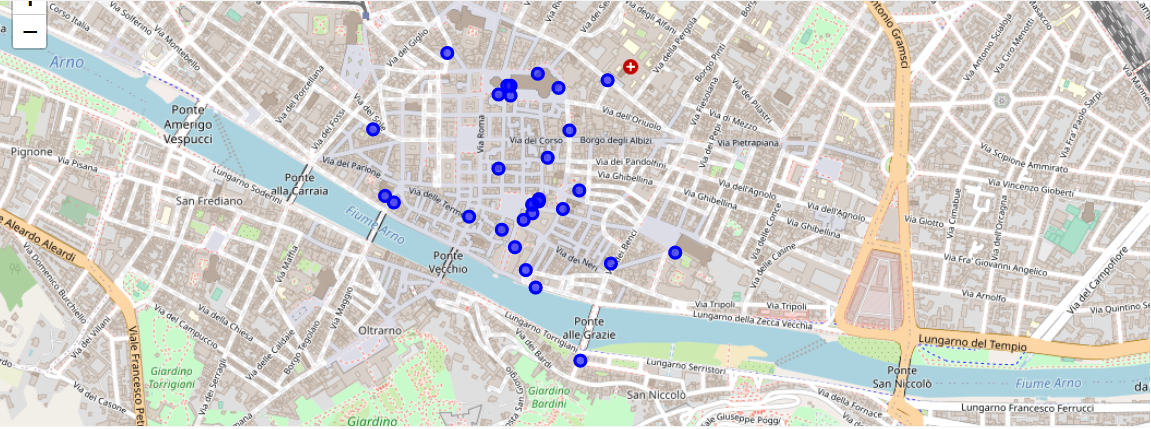

**2.2.4 Searching churches and creating dataframe**

Now the previous procedure seen for the researc about museums will be applied on churches.

First of all, define a query to search churches (in italian *chiesa* means church).

In [13]:
search_query_church = 'Chiesa'
radius = 500
print(search_query_church + ' .... OK!')

Chiesa .... OK!


Define the corresponding URL

In [14]:
url_church = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, search_query_church, radius, LIMIT)
url_church

'https://api.foursquare.com/v2/venues/search?client_id=Y2E14U4GP44DD3R0E1MLC51OSZ33I0QUJ1RTVXFGM2Y4NZBB&client_secret=3LJYB5GP2QSSJ04W5F2ZGWOSVPOIVRN0FUMQ1IQYORDZ2OD4&ll=43.7698712,11.2555757&oauth_token=SBC5N30W3PLCPW5RNKMJBRM3HYTAZRO4LMUHMYIARTS13MEM&v=20180604&query=Chiesa&radius=500&limit=30'

Send the GET result and examine the resutls

In [15]:
results = requests.get(url_church).json()

Get relevant part of JSON and transform it into a pandas dataframe

In [16]:
# assign relevant part of JSON to venues
venues_church = results['response']['venues']

# tranform venues into a dataframe
df_church = json_normalize(venues_church)
df_church.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


id                              name  \
0  51221e06e4b0b9b410cbdf62  Chiesa di San Carlo dei Lombardi   
1  4c9f024154c8a1cd6678934b          Chiesa di Santa Felicita   
2  4bc6fd362f94d13a7a0c117f            Chiesa di Orsanmichele   
3  4c62a105e1621b8d83d52353               Orzanmichele Chiesa   
4  4c629b7fec94a593479a29ca                   Chiesa di Dante   

                                          categories    referralId  hasPerk  \
0  [{'id': '4bf58dd8d48988d132941735', 'name': 'C...  v-1622499836    False   
1  [{'id': '4bf58dd8d48988d132941735', 'name': 'C...  v-1622499836    False   
2  [{'id': '4bf58dd8d48988d132941735', 'name': 'C...  v-1622499836    False   
3  [{'id': '4bf58dd8d48988d181941735', 'name': 'M...  v-1622499836    False   
4  [{'id': '4bf58dd8d48988d132941735', 'name': 'C...  v-1622499836    False   

   location.lat  location.lng  \
0     43.770665     11.255226   
1     43.766968     11.252400   
2     43.770671     11.255205   
3     43.769931     11.254812   
4     43.771241     11.257141   

                             location.labeledLatLngs  location.distance  \
0  [{'label': 'display', 'lat': 43.77066521192117...                 92   
1  [{'label': 'display', 'lat': 43.76696765452083...                411   
2  [{'label': 'display', 'lat': 43.7706709023181,...                 93   
3  [{'label': 'display', 'lat': 43.76993130530206...                 61   
4  [{'label': 'display', 'lat': 43.77124068518998...                197   

  location.cc location.city location.state location.country  \
0          IT       Firenze        Toscana           Italia   
1          IT       Firenze        Toscana           Italia   
2          IT       Firenze        Toscana           Italia   
3          IT       Firenze        Toscana           Italia   
4          IT       Firenze        Toscana           Italia   

                           location.formattedAddress  \
0                          [Firenze Toscana, Italia]   
1  [Piazza di Santa Felicita, 50125 Firenze Tosca...   
2  [Via dei Calzaiuoli, 50127 Firenze Toscana, It...   
3  [Via dei Calzaioli, 14-red-32-red, 50122 Firen...   
4  [Via Santa Margherita, 50123 Firenze Toscana, ...   

                   location.address location.postalCode location.neighborhood  \
0                               NaN                 NaN                   NaN   
1          Piazza di Santa Felicita               50125                   NaN   
2                Via dei Calzaiuoli               50127                   NaN   
3  Via dei Calzaioli, 14-red-32-red               50122                   NaN   
4              Via Santa Margherita               50123                   NaN   

  location.crossStreet  
0                  NaN  
1                  NaN  
2                  NaN  
3                  NaN  
4                  NaN

Define information of interest and filter dataframe

In [17]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns_church = ['name', 'categories'] + [col for col in df_church.columns if col.startswith('location.')] + ['id']
df_church_filtered = df_church.loc[:, filtered_columns_church]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
df_church_filtered['categories'] = df_church_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
df_church_filtered.columns = [column.split('.')[-1] for column in df_church_filtered.columns]

df_church_filtered.head()

name categories        lat        lng  \
0  Chiesa di San Carlo dei Lombardi     Church  43.770665  11.255226   
1          Chiesa di Santa Felicita     Church  43.766968  11.252400   
2            Chiesa di Orsanmichele     Church  43.770671  11.255205   
3               Orzanmichele Chiesa     Museum  43.769931  11.254812   
4                   Chiesa di Dante     Church  43.771241  11.257141   

                                      labeledLatLngs  distance  cc     city  \
0  [{'label': 'display', 'lat': 43.77066521192117...        92  IT  Firenze   
1  [{'label': 'display', 'lat': 43.76696765452083...       411  IT  Firenze   
2  [{'label': 'display', 'lat': 43.7706709023181,...        93  IT  Firenze   
3  [{'label': 'display', 'lat': 43.76993130530206...        61  IT  Firenze   
4  [{'label': 'display', 'lat': 43.77124068518998...       197  IT  Firenze   

     state country                                   formattedAddress  \
0  Toscana  Italia                          [Firenze Toscana, Italia]   
1  Toscana  Italia  [Piazza di Santa Felicita, 50125 Firenze Tosca...   
2  Toscana  Italia  [Via dei Calzaiuoli, 50127 Firenze Toscana, It...   
3  Toscana  Italia  [Via dei Calzaioli, 14-red-32-red, 50122 Firen...   
4  Toscana  Italia  [Via Santa Margherita, 50123 Firenze Toscana, ...   

                            address postalCode neighborhood crossStreet  \
0                               NaN        NaN          NaN         NaN   
1          Piazza di Santa Felicita      50125          NaN         NaN   
2                Via dei Calzaiuoli      50127          NaN         NaN   
3  Via dei Calzaioli, 14-red-32-red      50122          NaN         NaN   
4              Via Santa Margherita      50123          NaN         NaN   

                         id  
0  51221e06e4b0b9b410cbdf62  
1  4c9f024154c8a1cd6678934b  
2  4bc6fd362f94d13a7a0c117f  
3  4c62a105e1621b8d83d52353  
4  4c629b7fec94a593479a29ca

Now some column will be eliminated, mantaining only name, category, address, latitude and longitude.

In [18]:
df_church_filtered = df_church_filtered[['name','categories', 'address','lat','lng']]
df_church_filtered.head()

name categories  \
0  Chiesa di San Carlo dei Lombardi     Church   
1          Chiesa di Santa Felicita     Church   
2            Chiesa di Orsanmichele     Church   
3               Orzanmichele Chiesa     Museum   
4                   Chiesa di Dante     Church   

                            address        lat        lng  
0                               NaN  43.770665  11.255226  
1          Piazza di Santa Felicita  43.766968  11.252400  
2                Via dei Calzaiuoli  43.770671  11.255205  
3  Via dei Calzaioli, 14-red-32-red  43.769931  11.254812  
4              Via Santa Margherita  43.771241  11.257141

Let's have a look on the categories

In [19]:
df_church_filtered['categories'].value_counts()

Church    25
Museum     1
Name: categories, dtype: int64

Visualize the position of the curches on the map

In [20]:
venues_map_church = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred in Florence

# blue circles represent curches in Florence
for lat, lng, label in zip(df_church_filtered.lat, df_church_filtered.lng, df_church_filtered.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map_church)

# display map
venues_map_church

**NOTE**: the following image is inserted in order to be seen on github.

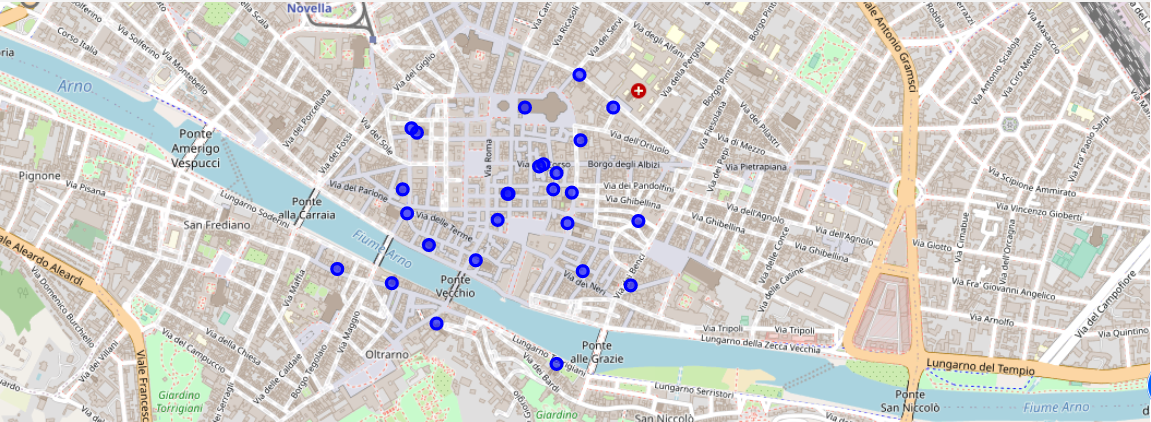

**2.2.5 Unite churches and museums in a unique dataframe**

Let's have a look about the shape of the previous dataframe

In [21]:
print(df_museum_filtered.shape)
print(df_church_filtered.shape)

(30, 5)
(26, 5)


Now unite the dataframes about churches and museums

In [22]:
df_total = df_museum_filtered.append(df_church_filtered, ignore_index = True)
df_total.head()

name      categories  \
0                                        Gucci Museo          Museum   
1                         Museo dell'Opera del Duomo          Museum   
2            Museo di Palazzo Vecchio (Museo Civico)      Art Museum   
3                       Museo Nazionale del Bargello      Art Museum   
4  Museo Galileo - Istituto e Museo di Storia del...  Science Museum   

                     address        lat        lng  
0  Piazza Della Signoria, 10  43.769762  11.256747  
1       Via della Canonica 1  43.772988  11.257492  
2      Piazza della Signoria  43.769422  11.256502  
3      Via del Proconsolo, 4  43.770058  11.258340  
4         Piazza dei Giudici  43.767799  11.256202

In [23]:
df_total.shape

(56, 5)

The shape of the final data frame correspond to the sum of the previous ones.

Now let's visualize churches and museums on a map

In [24]:
venues_map_total = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred in Florence

# the blue circles represent Florence museums and churches
for lat, lng, label in zip(df_total.lat, df_total.lng, df_total.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map_total)

# display map
venues_map_total

**NOTE**: the following image is inserted in order to be seen on github.

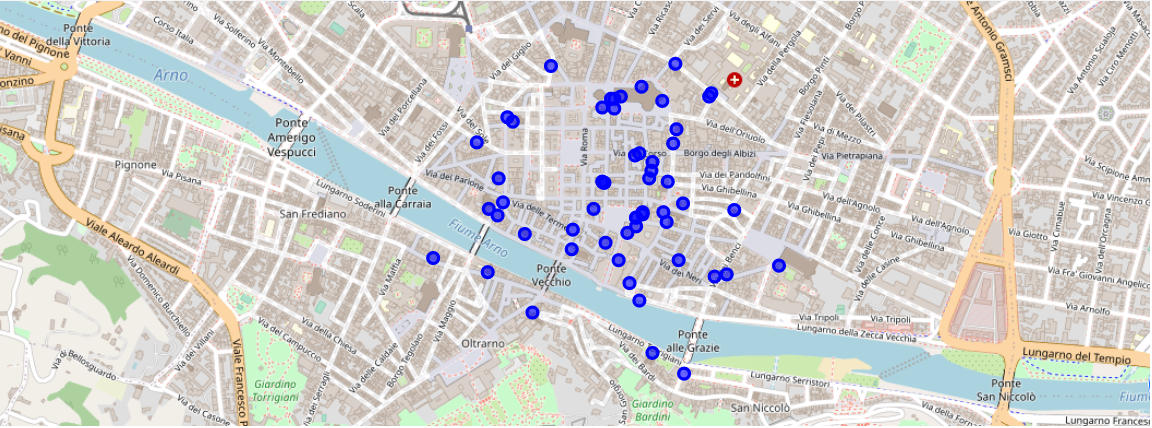

**2.2.6 Searching hotels**

Now define a query to search hotels in Florence.


In [25]:
search_query_hotel = 'Hotel'
radius = 500
print(search_query_hotel + ' .... OK!')

Hotel .... OK!


Define the corresponding URL

In [26]:
url_hotel = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, search_query_hotel, radius, LIMIT)
url_hotel

'https://api.foursquare.com/v2/venues/search?client_id=Y2E14U4GP44DD3R0E1MLC51OSZ33I0QUJ1RTVXFGM2Y4NZBB&client_secret=3LJYB5GP2QSSJ04W5F2ZGWOSVPOIVRN0FUMQ1IQYORDZ2OD4&ll=43.7698712,11.2555757&oauth_token=SBC5N30W3PLCPW5RNKMJBRM3HYTAZRO4LMUHMYIARTS13MEM&v=20180604&query=Hotel&radius=500&limit=30'

Send the GET request and examine the results

In [27]:
results_hotel = requests.get(url_hotel).json()

Get relevant part of JSON and transform it into a pandas dataframe

In [28]:
# assign relevant part of JSON to venues
venues_hotel = results_hotel['response']['venues']

# tranform venues into a dataframe
df_hotel = json_normalize(venues_hotel)
df_hotel.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


id                  name  \
0  5b5cb0e8d03360002cac6465   Hotel Savoy Firenze   
1  4bc8848fdc55eee14a85e8ac  Hotel Bernini Palace   
2  4d95ac749079b1f77604e609      Hotel Calzaiuoli   
3  4c15708177cea5932643d260   Relais Hotel Uffizi   
4  5cd89186db1d81002cb6e9d8   Il Gattopardo Hotel   

                                          categories    referralId  hasPerk  \
0  [{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...  v-1622499975    False   
1  [{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...  v-1622499975    False   
2  [{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...  v-1622499975    False   
3  [{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...  v-1622499975    False   
4  [{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...  v-1622499975    False   

            location.address  location.lat  location.lng  \
0  Piazza Della Repubblica 7     43.771884     11.254516   
1  Piazza di San Firenze, 29     43.769440     11.257540   
2                        NaN     43.771324     11.255368   
3            Via del buco 16     43.769115     11.254923   
4                        NaN     43.770559     11.256459   

                             location.labeledLatLngs  location.distance  \
0  [{'label': 'display', 'lat': 43.77188419874087...                239   
1  [{'label': 'display', 'lat': 43.76944, 'lng': ...                165   
2  [{'label': 'display', 'lat': 43.77132414522816...                162   
3  [{'label': 'display', 'lat': 43.76911484178026...                 99   
4  [{'label': 'display', 'lat': 43.770559, 'lng':...                104   

  location.postalCode location.cc location.city location.state  \
0               50123          IT       Firenze        Toscana   
1               50100          IT       Firenze        Toscana   
2                 NaN          IT           NaN            NaN   
3                 NaN          IT       Firenze        Toscana   
4               50122          IT       Firenze        Toscana   

  location.country                          location.formattedAddress  \
0           Italia  [Piazza Della Repubblica 7, 50123 Firenze Tosc...   
1           Italia  [Piazza di San Firenze, 29 (Borgo de' Greci), ...   
2           Italia                                           [Italia]   
3           Italia         [Via del buco 16, Firenze Toscana, Italia]   
4           Italia                    [50122 Firenze Toscana, Italia]   

  location.crossStreet venuePage.id  
0                  NaN          NaN  
1      Borgo de' Greci          NaN  
2                  NaN          NaN  
3                  NaN          NaN  
4                  NaN          NaN

Define information of interest and filter dataframe


In [29]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns_hotel = ['name', 'categories'] + [col for col in df_hotel.columns if col.startswith('location.')] + ['id']
df_hotel_filtered = df_hotel.loc[:, filtered_columns_hotel]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
df_hotel_filtered['categories'] = df_hotel_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
df_hotel_filtered.columns = [column.split('.')[-1] for column in df_hotel_filtered.columns]

df_hotel_filtered.head()

name categories                    address        lat  \
0   Hotel Savoy Firenze      Hotel  Piazza Della Repubblica 7  43.771884   
1  Hotel Bernini Palace      Hotel  Piazza di San Firenze, 29  43.769440   
2      Hotel Calzaiuoli      Hotel                        NaN  43.771324   
3   Relais Hotel Uffizi      Hotel            Via del buco 16  43.769115   
4   Il Gattopardo Hotel      Hotel                        NaN  43.770559   

         lng                                     labeledLatLngs  distance  \
0  11.254516  [{'label': 'display', 'lat': 43.77188419874087...       239   
1  11.257540  [{'label': 'display', 'lat': 43.76944, 'lng': ...       165   
2  11.255368  [{'label': 'display', 'lat': 43.77132414522816...       162   
3  11.254923  [{'label': 'display', 'lat': 43.76911484178026...        99   
4  11.256459  [{'label': 'display', 'lat': 43.770559, 'lng':...       104   

  postalCode  cc     city    state country  \
0      50123  IT  Firenze  Toscana  Italia   
1      50100  IT  Firenze  Toscana  Italia   
2        NaN  IT      NaN      NaN  Italia   
3        NaN  IT  Firenze  Toscana  Italia   
4      50122  IT  Firenze  Toscana  Italia   

                                    formattedAddress      crossStreet  \
0  [Piazza Della Repubblica 7, 50123 Firenze Tosc...              NaN   
1  [Piazza di San Firenze, 29 (Borgo de' Greci), ...  Borgo de' Greci   
2                                           [Italia]              NaN   
3         [Via del buco 16, Firenze Toscana, Italia]              NaN   
4                    [50122 Firenze Toscana, Italia]              NaN   

                         id  
0  5b5cb0e8d03360002cac6465  
1  4bc8848fdc55eee14a85e8ac  
2  4d95ac749079b1f77604e609  
3  4c15708177cea5932643d260  
4  5cd89186db1d81002cb6e9d8

Now some column will be eliminated, mantaining only name, category, address, latitude and longitude.

In [30]:
df_hotel_filtered = df_hotel_filtered[['name','categories', 'address','lat','lng']]
df_hotel_filtered.head()

name categories                    address        lat  \
0   Hotel Savoy Firenze      Hotel  Piazza Della Repubblica 7  43.771884   
1  Hotel Bernini Palace      Hotel  Piazza di San Firenze, 29  43.769440   
2      Hotel Calzaiuoli      Hotel                        NaN  43.771324   
3   Relais Hotel Uffizi      Hotel            Via del buco 16  43.769115   
4   Il Gattopardo Hotel      Hotel                        NaN  43.770559   

         lng  
0  11.254516  
1  11.257540  
2  11.255368  
3  11.254923  
4  11.256459

Let's visualize the hotels on the map

In [31]:
venues_map_hotel = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred in Florence

# the blue circles represent Florence hotels
for lat, lng, label in zip(df_hotel_filtered.lat, df_hotel_filtered.lng, df_hotel_filtered.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map_hotel)

# display map
venues_map_hotel

**NOTE**: the following image is inserted in order to be seen on github.

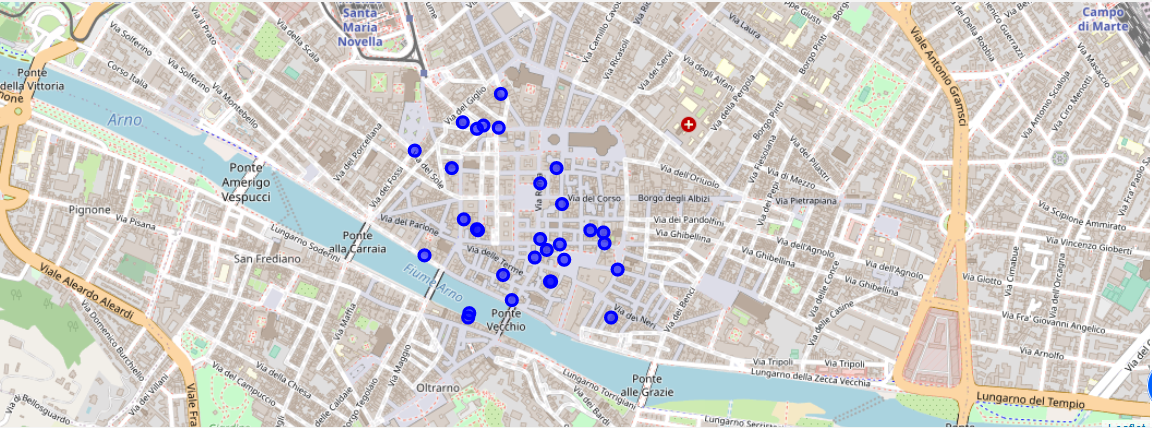

## **3. Analyze and data**

### **3.1 Introduction**

In this section we will analyze data using the clustering model: K-Nearest Neighbours (KNN). In the first step the clusterig algorythm will be applied on the data frame with churches and museums, in order to find the zone with the highest concentration of these cultural sites. The results will be displayed on a map of the city. Subsequently, the position of the hotels will be overlapped on clusters in order to find the best candidates for the client.

### **3.2 Clustering with KNN**

**3.2.1 Import needed libraries**

In [32]:
!pip install scikit-learn==0.23.1

     |████████████████████████████████| 6.9MB 22.4MB/s eta 0:00:01
     |████████████████████████████████| 307kB 52.9MB/s eta 0:00:01
  Found existing installation: scikit-learn 0.20.1
    Uninstalling scikit-learn-0.20.1:
      Successfully uninstalled scikit-learn-0.20.1


In [33]:
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline

from sklearn.neighbors import KNeighborsClassifier

from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs

print('Libraries imported.')

Libraries imported.


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


**3.2.2 Finding the best number of clusters**

To create clusters with k-means clustering we need to know the right number of clusters. One method to validate the number of clusters is the ***elbow method***. The idea of the elbow method is to run k-means clustering on the dataset for a range of values of k (e.g. k from 1 to 10), and for each value of k calculate the Sum of Squared Errors (SSE).

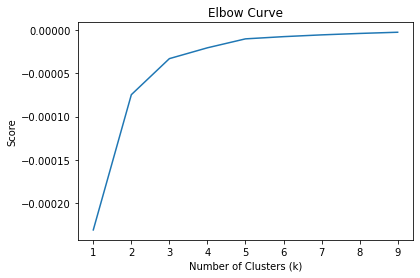

In [34]:
# K-means
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]

Y_axis = df_total[['lat']]
X_axis = df_total[['lng']]

score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]

# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

**3.2.3 Setting up k-means**

The k-Means parameters, that we will use, will be these three:

- init: Initialization method of the centroids. Value will be: "k-means++". k-means++ selects initial cluster centers for k-means clustering in a smart way to speed up convergence.

- n_clusters: The number of clusters to form as well as the number of centroids to generate. Value will be: 5

- n_init: Number of times the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia. Value will be: 10


In [87]:
k_means = KMeans(n_clusters = 5, init ='k-means++', n_init=10)    # Initialize K-means

k_means.fit(df_total[df_total.columns[3:5]]) # Compute k-means clustering.

df_total['cluster_label'] = k_means.fit_predict(df_total[df_total.columns[3:5]])

centers = k_means.cluster_centers_ # Coordinates of cluster centers.

labels = k_means.predict(df_total[df_total.columns[3:5]]) # Labels of each point

df_total.head(5)

name      categories  \
0                                        Gucci Museo          Museum   
1                         Museo dell'Opera del Duomo          Museum   
2            Museo di Palazzo Vecchio (Museo Civico)      Art Museum   
3                       Museo Nazionale del Bargello      Art Museum   
4  Museo Galileo - Istituto e Museo di Storia del...  Science Museum   

                     address        lat        lng  cluster_label  
0  Piazza Della Signoria, 10  43.769762  11.256747              1  
1       Via della Canonica 1  43.772988  11.257492              4  
2      Piazza della Signoria  43.769422  11.256502              1  
3      Via del Proconsolo, 4  43.770058  11.258340              4  
4         Piazza dei Giudici  43.767799  11.256202              1

Let's see how many data are in every single clusters

In [88]:
df_total['cluster_label'].value_counts()

1    18
4    13
3    11
2     7
0     7
Name: cluster_label, dtype: int64

According the previous data the cluster with the most amount of cultural site is the one with **cluster_label = 1**. In the following section we will visualize the clusters on a map.

**Note:** ererywhen the KNN code is run, values of the column *cluster_label* and the number of the elements in the clusters
 can change. Therefore the following coding and images are based using the following result of clustering:
 
 df_total['cluster_label'].value_counts()
 
|cluster_label | value counts |
|---|---|
|1|18|
|4|13|
|3|11|
|2|7|
|0|7|

**3.2.4 Visualization of clusters on the map**

First of all, create different data frames for every clusters

***Cluster 0***

In [89]:
df_total_0 = df_total[df_total['cluster_label'] == 0]
df_total_0.reset_index(drop=True, inplace=True)
df_total_0.shape

(7, 6)

***Cluster 1***

In [90]:
df_total_1 = df_total[df_total['cluster_label'] == 1]
df_total_1.reset_index(drop=True, inplace=True)
df_total_1.shape

(18, 6)

***Cluster 2***

In [91]:
df_total_2 = df_total[df_total['cluster_label'] == 2]
df_total_2.reset_index(drop=True, inplace=True)
df_total_2.shape

(7, 6)

***Cluster 3***

In [92]:
df_total_3 = df_total[df_total['cluster_label'] == 3]
df_total_3.reset_index(drop=True, inplace=True)
df_total_3.shape

(11, 6)

***Cluster 4***

In [93]:
df_total_4 = df_total[df_total['cluster_label'] == 4]
df_total_4.reset_index(drop=True, inplace=True)
df_total_4.shape

(13, 6)

Now let's visualize on the map every clusters.

In [94]:
venues_map_total = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred in Florence

# the blue circles represent Cluster 0
for lat, lng, label in zip(df_total_0.lat, df_total_0.lng, df_total_0.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map_total)
    
# the red circles represent Cluster 1
for lat, lng, label in zip(df_total_1.lat, df_total_1.lng, df_total_1.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='red',
        popup=label,
        fill = True,
        fill_color='red',
        fill_opacity=0.6
    ).add_to(venues_map_total) 
    
# the green circles represent Cluster 2
for lat, lng, label in zip(df_total_2.lat, df_total_2.lng, df_total_2.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='green',
        popup=label,
        fill = True,
        fill_color='green',
        fill_opacity=0.6
    ).add_to(venues_map_total)   
    
# the purple circles represent Cluster 3
for lat, lng, label in zip(df_total_3.lat, df_total_3.lng, df_total_3.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='purple',
        popup=label,
        fill = True,
        fill_color='purple',
        fill_opacity=0.6
    ).add_to(venues_map_total)    
    
# the orange circles represent Cluster 4
for lat, lng, label in zip(df_total_4.lat, df_total_4.lng, df_total_4.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='orange',
        popup=label,
        fill = True,
        fill_color='orange',
        fill_opacity=0.6
    ).add_to(venues_map_total)    
    
# display map
venues_map_total

The color of the clusters are the following:
- Cluster 0 = blue
- Cluster 1 = red
- Cluster 2 = green
- Cluster 3 = purple
- Cluster 4 = orange

**NOTE**: the next image is inserted in order to be seen on github.

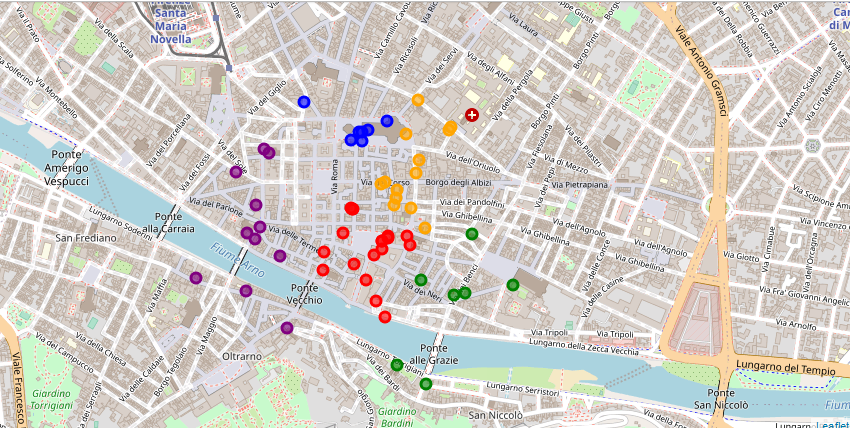

Now let's add the ***hotel*** data (***black circles***) in the previous map

In [96]:
venues_map_total = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred in Florence

# the blue circles represent Cluster 0
for lat, lng, label in zip(df_total_0.lat, df_total_0.lng, df_total_0.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map_total)
    
# the red circles represent Cluster 1
for lat, lng, label in zip(df_total_1.lat, df_total_1.lng, df_total_1.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='red',
        popup=label,
        fill = True,
        fill_color='red',
        fill_opacity=0.6
    ).add_to(venues_map_total) 
    
# the green circles represent Cluster 2
for lat, lng, label in zip(df_total_2.lat, df_total_2.lng, df_total_2.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='green',
        popup=label,
        fill = True,
        fill_color='green',
        fill_opacity=0.6
    ).add_to(venues_map_total)   
    
# the purple circles represent Cluster 3
for lat, lng, label in zip(df_total_3.lat, df_total_3.lng, df_total_3.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='purple',
        popup=label,
        fill = True,
        fill_color='purple',
        fill_opacity=0.6
    ).add_to(venues_map_total)    
    
# the orange circles represent Cluster 4
for lat, lng, label in zip(df_total_4.lat, df_total_4.lng, df_total_4.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='orange',
        popup=label,
        fill = True,
        fill_color='orange',
        fill_opacity=0.6
    ).add_to(venues_map_total)
    
#the black circles represents the hotels
for lat, lng, label in zip(df_hotel_filtered.lat, df_hotel_filtered.lng, df_hotel_filtered.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='black',
        popup=label,
        fill = True,
        fill_color='black',
        fill_opacity=0.6
    ).add_to(venues_map_total)
    
# display map
venues_map_total

The color of the clusters are the following:
- Cluster 0 = blue
- Cluster 1 = red
- Cluster 2 = green
- Cluster 3 = purple
- Cluster 4 = orange
- Hotel = black

**NOTE**: the following image is inserted in order to be seen on github.

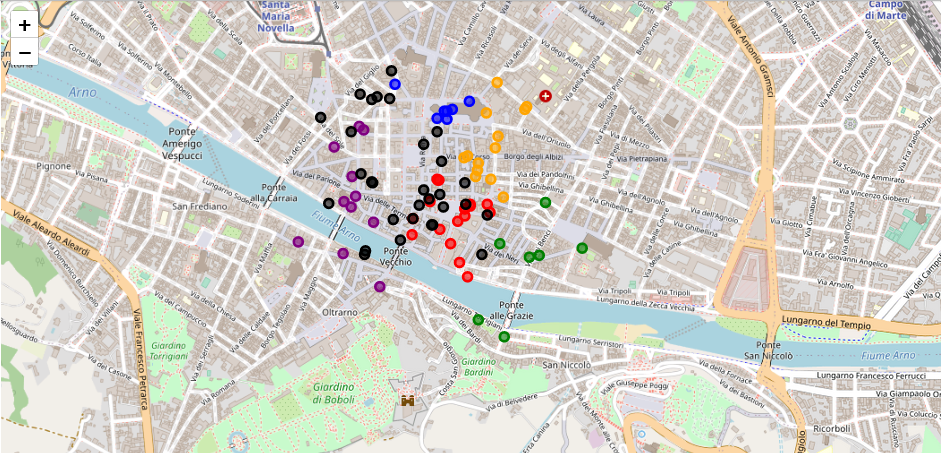

We can see there are several hotels in the zone of the cluster 1 (the one with the higher number of cultural sites; red circles). In the next paragraph we will search the nearest hotels to the centroids of this cluster.

### **3.3 Finding the nearest hotels to the densest cluster's centroid**

We have already find the cluster wth the highest number of churches or museums (**Cluster 1**). Now we need to find the suitable hotel for the client. To this aim the hotel which are the nearest to the cluster's centroid will be selected.

First of all, let's convert the array containing centroids coordinates into a data frame:

In [97]:
cluster_centroids = pd.DataFrame(centers, columns=['lat', 'lng'])
cluster_centroids

lat        lng
0  43.773166  11.255365
1  43.769415  11.255923
2  43.767678  11.259384
3  43.770008  11.250994
4  43.771845  11.257740

Considering the label of the selected cluster is 1, we just need the centroid with the index 1.

In [126]:
cluster_centroids_1 = cluster_centroids[1:2]
cluster_centroids_1.reset_index(drop=True, inplace=True)
cluster_centroids_1

lat        lng
0  43.769415  11.255923

The following step will be calculating the distance of the hotels from that specific centroid. For this aim we need to convert latitude and longitude values in radians so add these columns to the dataframe using np.radians.

In [99]:
# add columns with radians for latitude and longitude
df_hotel_filtered[['lat_radians','lng_radians']] = (
    np.radians(df_hotel_filtered.loc[:,['lat','lng']])
)
cluster_centroids_1[['lat_radians','lng_radians']] = (
    np.radians(cluster_centroids_1.loc[:,['lat','lng']])
)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


Now let's add a column to use in the following code

In [100]:
cluster_centroids_1[['centroid']] = 'distance from centroid 1'

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/indexing.py:659: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[k] = np.nan
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

In [101]:
cluster_centroids_1

lat        lng  lat_radians  lng_radians                  centroid
0  43.769415  11.255923      0.76392     0.196453  distance from centroid 1

In [102]:
df_hotel_filtered.head()

name categories                    address        lat  \
0   Hotel Savoy Firenze      Hotel  Piazza Della Repubblica 7  43.771884   
1  Hotel Bernini Palace      Hotel  Piazza di San Firenze, 29  43.769440   
2      Hotel Calzaiuoli      Hotel                        NaN  43.771324   
3   Relais Hotel Uffizi      Hotel            Via del buco 16  43.769115   
4   Il Gattopardo Hotel      Hotel                        NaN  43.770559   

         lng  lat_radians  lng_radians  
0  11.254516     0.763963     0.196428  
1  11.257540     0.763921     0.196481  
2  11.255368     0.763954     0.196443  
3  11.254923     0.763915     0.196435  
4  11.256459     0.763940     0.196462

The distance computed here is a haversine distance (sklearn library). This assumes the earth is a true sphere making the computation fast. The computation assumes the radius of the sphere is 1, so to get the distance in kilometers we multiply the output of the sklearn computation by 6371 km, the average radius of the earth (to get the distance in miles this number would be 3959 miles).

Let's import the needed libraries

In [103]:
!pip install scikit-learn
print('Library imported')

Library imported


In [104]:
import sklearn
from sklearn.neighbors import DistanceMetric

create the distance matrix

In [105]:
dist = sklearn.neighbors.DistanceMetric.get_metric('haversine')
dist_matrix = (dist.pairwise
    (df_hotel_filtered[['lat_radians','lng_radians']],
    cluster_centroids_1[['lat_radians','lng_radians']])* 6371 
)
# Note that  6371  is the radius of the earth in Km 
df_dist_matrix = (
    pd.DataFrame(dist_matrix, index=df_hotel_filtered['name'],
                 columns=cluster_centroids_1['centroid'])
)
df_dist_matrix.head()

centroid              distance from centroid 1
name                                          
Hotel Savoy Firenze                   0.296906
Hotel Bernini Palace                  0.129837
Hotel Calzaiuoli                      0.216930
Relais Hotel Uffizi                   0.087016
Il Gattopardo Hotel                   0.134290

Now let's sort the distance data frame by ascendant value of the distance and select the first 7 rows. These results represent the 7 nearest hotels to this cluster's centroid.These results represent the top 7 hotels the client can chose for the holiday.

In [106]:
df_top7 = df_dist_matrix.sort_values(by=['distance from centroid 1']).head(7)
df_top7

centroid                                 distance from centroid 1
name                                                             
Hotel Torre Guelfa (Palazzo Acciaiuoli)                  0.050652
La Casa Del garbo Hotel                                  0.066505
Relais Hotel Uffizi                                      0.087016
Hotel Relais Uffizi                                      0.088538
Fh Hotel Calzaiuoli                                      0.096272
Olga's House Hotel Florence                              0.114010
Hotel Bernini Palace                                     0.129837

## **4. Discussion and suggestion**

After we have found the densest cluster and the found the top 7 hotels which are in proximity of this cluster's centroid we need to add addresses and coordinates in order to visualize the locations on a map.

In [107]:
df_top7.reset_index(inplace=True)   #let's transform the index in a column and remove the columns name.
df_top7.columns.name = None

df_result = pd.merge(df_top7, df_hotel_filtered, on="name")    # Let's add to the dataframe the needed columns.

df_result.drop(['lat_radians', 'lng_radians'], axis='columns', inplace=True)     #Let's eliminate the columns containing the coordinates in radians
df_result

name  distance from centroid 1  \
0  Hotel Torre Guelfa (Palazzo Acciaiuoli)                  0.050652   
1                  La Casa Del garbo Hotel                  0.066505   
2                      Relais Hotel Uffizi                  0.087016   
3                      Hotel Relais Uffizi                  0.088538   
4                      Fh Hotel Calzaiuoli                  0.096272   
5              Olga's House Hotel Florence                  0.114010   
6                     Hotel Bernini Palace                  0.129837   

        categories                                    address        lat  \
0             None                 Via Borgo S.S. Apostoli, 8  43.769732   
1  Bed & Breakfast                                        NaN  43.769826   
2            Hotel                            Via del buco 16  43.769115   
3            Hotel                        16 Chiasso del Buco  43.769115   
4            Hotel                      Via dei Calzaiuoli, 6  43.770150   
5             None  Via Calimaruzza 4 - Piazza della Signoria  43.770010   
6            Hotel                  Piazza di San Firenze, 29  43.769440   

         lng  
0  11.255471  
1  11.256525  
2  11.254923  
3  11.254902  
4  11.255290  
5  11.254768  
6  11.257540

Now let's visualize the position of the top 7 hotel obtained with the clusters.

In [111]:
venues_map_result = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred in Florence

# the blue circles represent Cluster 0
for lat, lng, label in zip(df_total_0.lat, df_total_0.lng, df_total_0.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map_result)
    
# the red circles represent Cluster 1
for lat, lng, label in zip(df_total_1.lat, df_total_1.lng, df_total_1.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='red',
        popup=label,
        fill = True,
        fill_color='red',
        fill_opacity=0.6
    ).add_to(venues_map_result) 
    
# the green circles represent Cluster 2
for lat, lng, label in zip(df_total_2.lat, df_total_2.lng, df_total_2.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='green',
        popup=label,
        fill = True,
        fill_color='green',
        fill_opacity=0.6
    ).add_to(venues_map_result)   
    
# the purple circles represent Cluster 3
for lat, lng, label in zip(df_total_3.lat, df_total_3.lng, df_total_3.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='purple',
        popup=label,
        fill = True,
        fill_color='purple',
        fill_opacity=0.6
    ).add_to(venues_map_result)    
    
# the orange circles represent Cluster 4
for lat, lng, label in zip(df_total_4.lat, df_total_4.lng, df_total_4.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='orange',
        popup=label,
        fill = True,
        fill_color='orange',
        fill_opacity=0.6
    ).add_to(venues_map_result)  
    
# the black circles represent top 7 hotels
for lat, lng, label in zip(df_result.lat, df_result.lng, df_result.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='black',
        popup=label,
        fill = True,
        fill_color='black',
        fill_opacity=0.6
    ).add_to(venues_map_result)  
    
    
# display map
venues_map_result

**NOTE**: the following image is inserted in order to be seen on github.

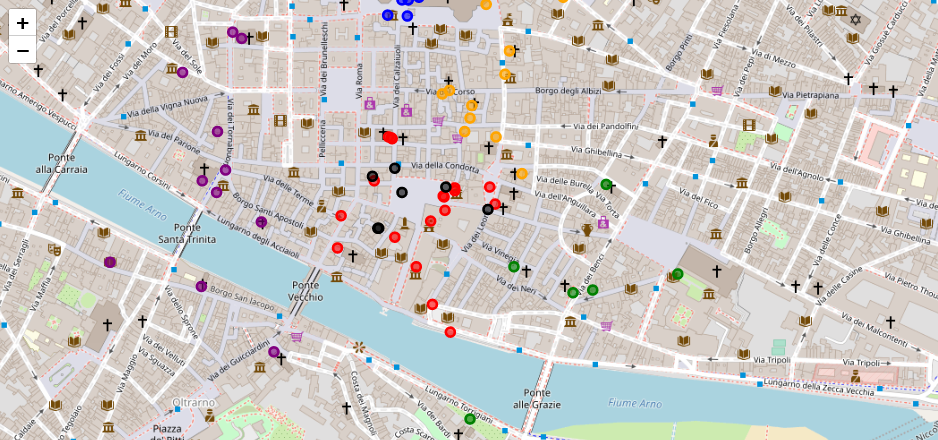

In conclusion, these are the 7 most suggested hotels for an efficient holiday in Florence. In parcticular, **Hotel Torre Guelfa** and **La Casa Del garbo Hotel** can be the best ones because they are in the middle of the densest cluster. Moreover, in case of longer holiday, they are not far from the cluster 4 (orange circles), the second densest cluster.